# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [4]:
from unityagents import UnityEnvironment
import numpy as np

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
brain_name

'ReacherBrain'

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [32]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.2199999950826168


When finished, you can close the environment.

In [6]:
env.close()

### 4. Programming

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
This project is done by the Actor-Critic network, which is a policy-based approach. Put **model.py** and **ddpg_agent.py** in the same directory as the jupyter notebook.

- **model.py**: the structure of actor network, and critic network. Droupout and batch normalization, are used, and the structure of actor network are modified to imrpove the performance of the network.
- **ddpg_agent.py**: details of the agent that needs to be created to solve the problem

There are two classes in this notebook, i.e., **ddpg**, and **multi_ddpg**, which are used to solve the single agent problem, and multiple agents problem.



In [9]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent

In [10]:



agent = Agent(state_size=33, action_size=4, random_seed=1)
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor_every300.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic_every300.pth'))
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor_every200_st4.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic_every200_st4.pth'))


In [7]:
# import random
# import torch
# import numpy as np
# from collections import deque
# import matplotlib.pyplot as plt
# %matplotlib inline
# from ddpg_agent import Agent


# agent = Agent(state_size=33, action_size=4, random_seed=10)
def ddpg(n_episodes=800, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] 
        state = env_info.vector_observations 
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state, reward, done= env_info.vector_observations, env_info.rewards[0], env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward 
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
#         if i_episode % 100 == 0:
#             torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
#             torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
#             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if i_episode % 200 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_every200_st5.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_every200_st5.pth')        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') 
            break
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


RuntimeError: The size of tensor a (1280) must match the size of tensor b (64) at non-singleton dimension 0

In [11]:
def multi_ddpg(n_episodes=10000, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] 
        state = env_info.vector_observations
        score = 0
        agent.reset()
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state, reward, done= env_info.vector_observations, env_info.rewards, env_info.local_done
            for i in range(20):

#                 agent.memory.add(state[i], action[i], reward[i], next_state[i], done[i])
                
#                 if len(agent.memory) > BATCH_SIZE:
# #                     memory_mid = 
#                     agent.learn(agent.memory.sample(), 0.99)
                agent.step(state[i], action[i], reward[i], next_state[i], done[i])
#             agent.step(state, action, reward, next_state, done)
#                 if done[i]:
#                     break 
            if sum(done) >0:
                break 
            state = next_state
            score += np.sum(reward )

        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if i_episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_every200_st5.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_every200_st5.pth')        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') 
            break
    return scores
    
scores = multi_ddpg()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.plot(np.arange(1, len(scores)+1), scores)
# plt.ylabel('Score')
# plt.xlabel('Episode #')
# plt.show()

/home/frank2/Downloads/Reacher_Linux/ddpg_agent.py:123: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 17	Average Score: 30.91	Score: 64.44
Environment solved in -83 episodes!	Average Score: 30.91


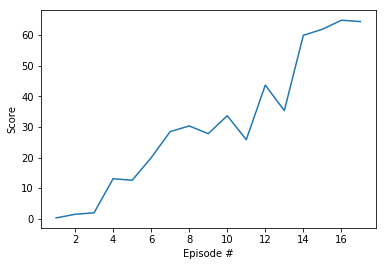

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Future work


Several things could be used to improve the performance of the Actor-Critic network:
- Further Tune the hyper-parameter of the actor network to improve the performance
- Use other networks, such as Trust Region Policy Optimization (TRPO), Truncated Natural Policy Gradient (TNPG), and Proximal Policy Optimization (PPO)